<a href="https://colab.research.google.com/github/Ivan1steer/ML_lab/blob/main/ML_LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/drive/MyDrive/Tweets.csv'

In [ ]:
questions = pd.read_csv(url,encoding='utf-8')
questions.columns=['textID','text', 'selected_text', 'sentiment']
questions.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [ ]:
questions.tail()

textID                                               text  \
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral

In [ ]:
questions.describe()

textID                                  text selected_text  \
count        27481                                 27480         27480   
unique       27481                                 27480         22463   
top     cb774db0d1   I`d have responded, if I were going          good   
freq             1                                     1           199   

       sentiment  
count      27481  
unique         3  
top      neutral  
freq       11118

In [ ]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

questions = standardize_text(questions, "text")
questions = standardize_text(questions, "selected_text")
questions.to_csv("clean_data.csv")
questions.head()

textID                                               text  \
0  cb774db0d1                i`d have responded, if i were going   
1  549e992a42      sooo sad i will miss you here in san diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [ ]:
clean_questions = pd.read_csv("clean_data.csv")
clean_questions.tail()

Unnamed: 0      textID  \
27476       27476  4eac33d1c0   
27477       27477  4f4c4fc327   
27478       27478  f67aae2310   
27479       27479  ed167662a5   
27480       27480  6f7127d9d7   

                                                    text  \
27476   wish we could come see u on denver  husband l...   
27477   i`ve wondered about rake to.  the client has ...   
27478   yay good for both of you. enjoy the break - y...   
27479                         but it was worth it  ****.   
27480     all this flirting going on - the atg smiles...   

                                           selected_text sentiment  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral

In [ ]:
clean_questions.groupby("sentiment").count()

Unnamed: 0  textID   text  selected_text
sentiment                                          
negative         7781    7781   7781           7781
neutral         11118   11118  11117          11117
positive         8582    8582   8582           8582

In [ ]:
clean_questions=clean_questions.dropna()

 i`d have responded, if i were going  sooo sad i will miss you here in san diego!!! my boss is bullying me...  what interview! leave me alone  sons of ****, why couldn`t they put them on the releases we already bought ://www.dothebouncy.com/smf - some shameless plugging for the best rangers forum on earth 2am feedings for the baby are fun when he is all smiles and coos soooo high  both of you  journey!? wow... u just became cooler.  hehe... (is that possible!?)  as much as i love to be hopeful, i reckon the chances are minimal =p i`m never gonna get my cake and stuff i really really like the song love story by taylor swift my sharpie is running dangerously low on ink i want to go to music tonight but i lost my voice. test test from the lg env2 uh oh, i am sunburned  s`ok, trying to plot alternatives as we speak *sigh* i`ve been sick for the past few days  and thus, my hair looks wierd.  if i didnt have a hat on it would look... ://tinyurl.com/mnf4kw is back home now      gonna miss eve

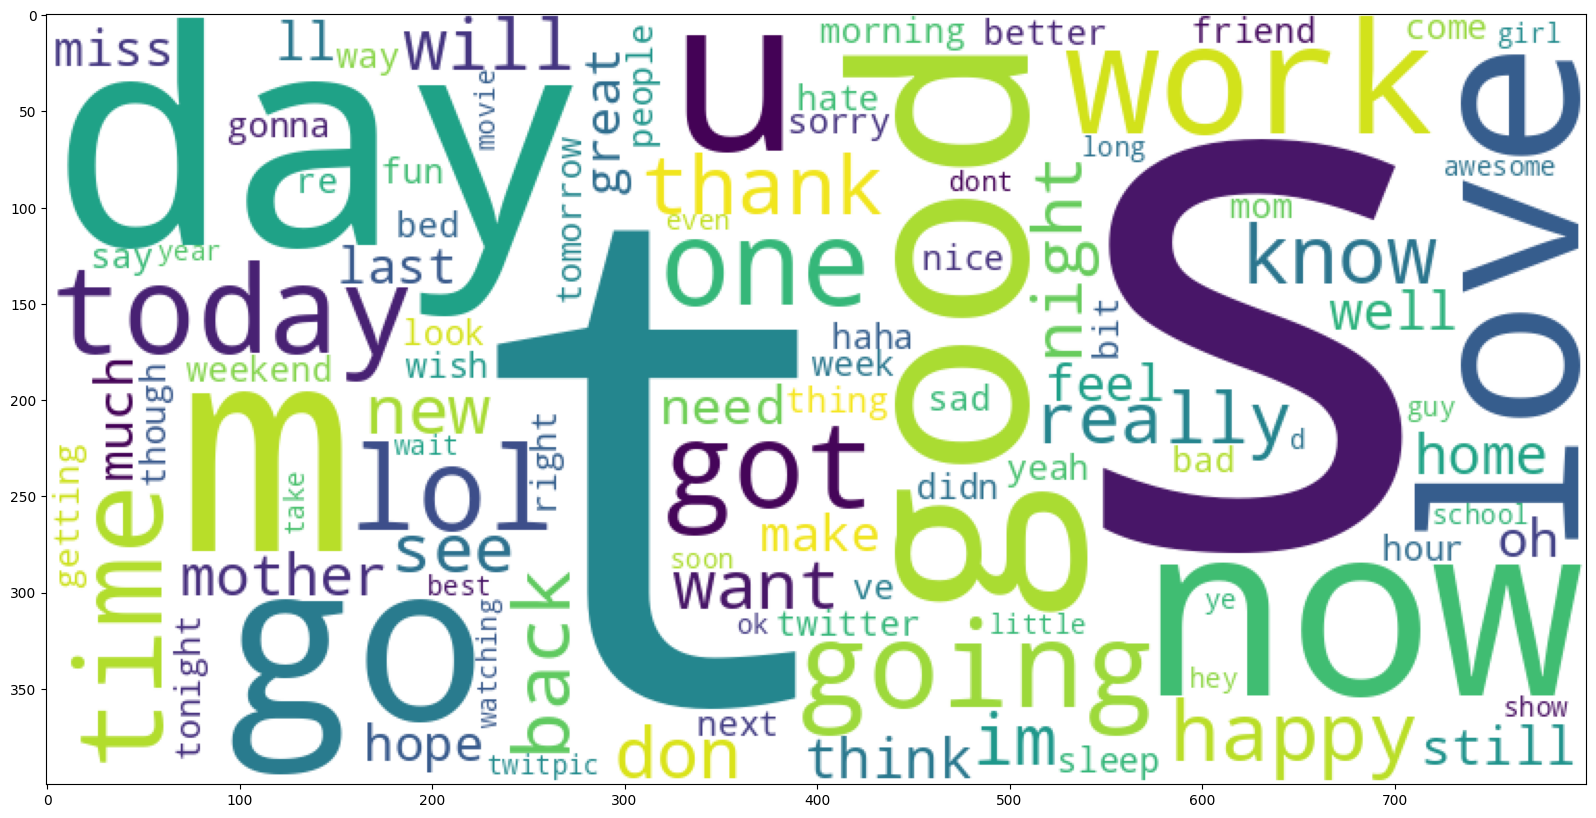

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

a = " ".join(clean_questions["text"])
print(a)

en_cloud = WordCloud(max_words=100, background_color='white',
                     width=800, height=400,
                     collocations=False).generate(a)
fig = plt.figure(figsize=(20, 10))
plt.imshow(en_cloud);

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_questions["tokens"] = clean_questions["text"].apply(tokenizer.tokenize)
clean_questions.head()

Unnamed: 0      textID                                               text  \
0           0  cb774db0d1                i`d have responded, if i were going   
1           1  549e992a42      sooo sad i will miss you here in san diego!!!   
2           2  088c60f138                          my boss is bullying me...   
3           3  9642c003ef                     what interview! leave me alone   
4           4  358bd9e861   sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  \
0  I`d have responded, if I were going   neutral   
1                             Sooo SAD  negative   
2                          bullying me  negative   
3                       leave me alone  negative   
4                        Sons of ****,  negative   

                                              tokens  
0        [i, d, have, responded, if, i, were, going]  
1  [sooo, sad, i, will, miss, you, here, in, san,...  
2                       [my, boss, is, bullying, me]  
3                [what, interview, leave, me, alone]  
4  [sons, of, why, couldn, t, they, put, them, on...

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from  keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in clean_questions["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

367556 words total, with a vocabulary size of 26477
Max sentence length is 39


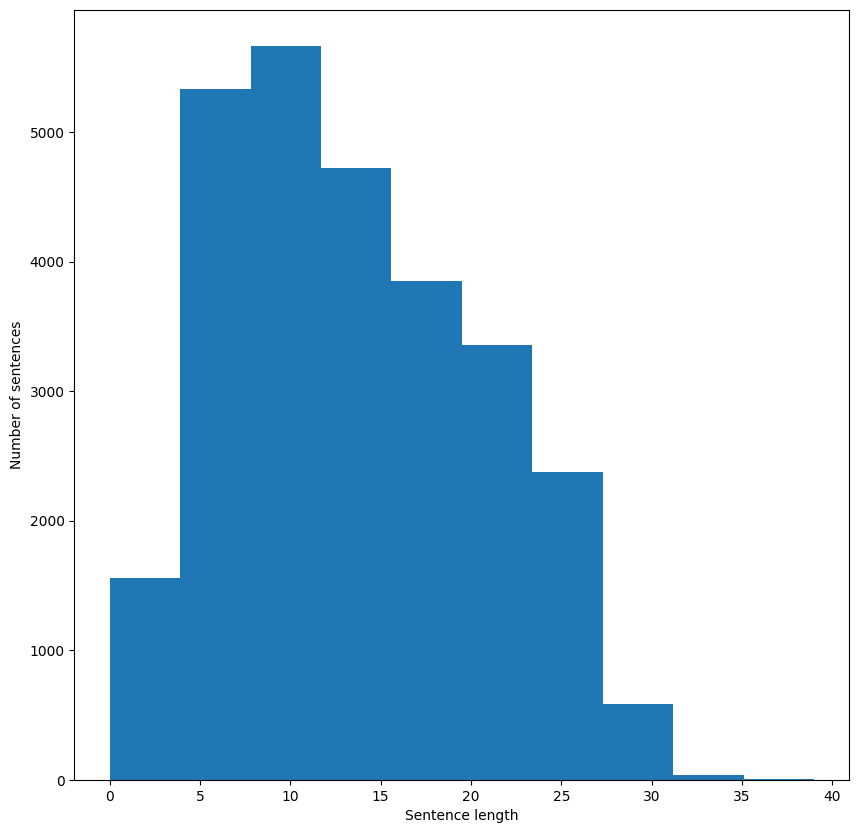

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer


clean_questions.loc[clean_questions["sentiment"] == 'negative', 'sentimen t_ind'] = 0
clean_questions.loc[clean_questions["sentiment"] == 'neutral', 'sentiment_ind'] = 1
clean_questions.loc[clean_questions["sentiment"] == 'positive', 'sentiment_ind'] = 2
list_corpus = clean_questions["text"].tolist()
list_labels = clean_questions["sentiment_ind"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2,
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

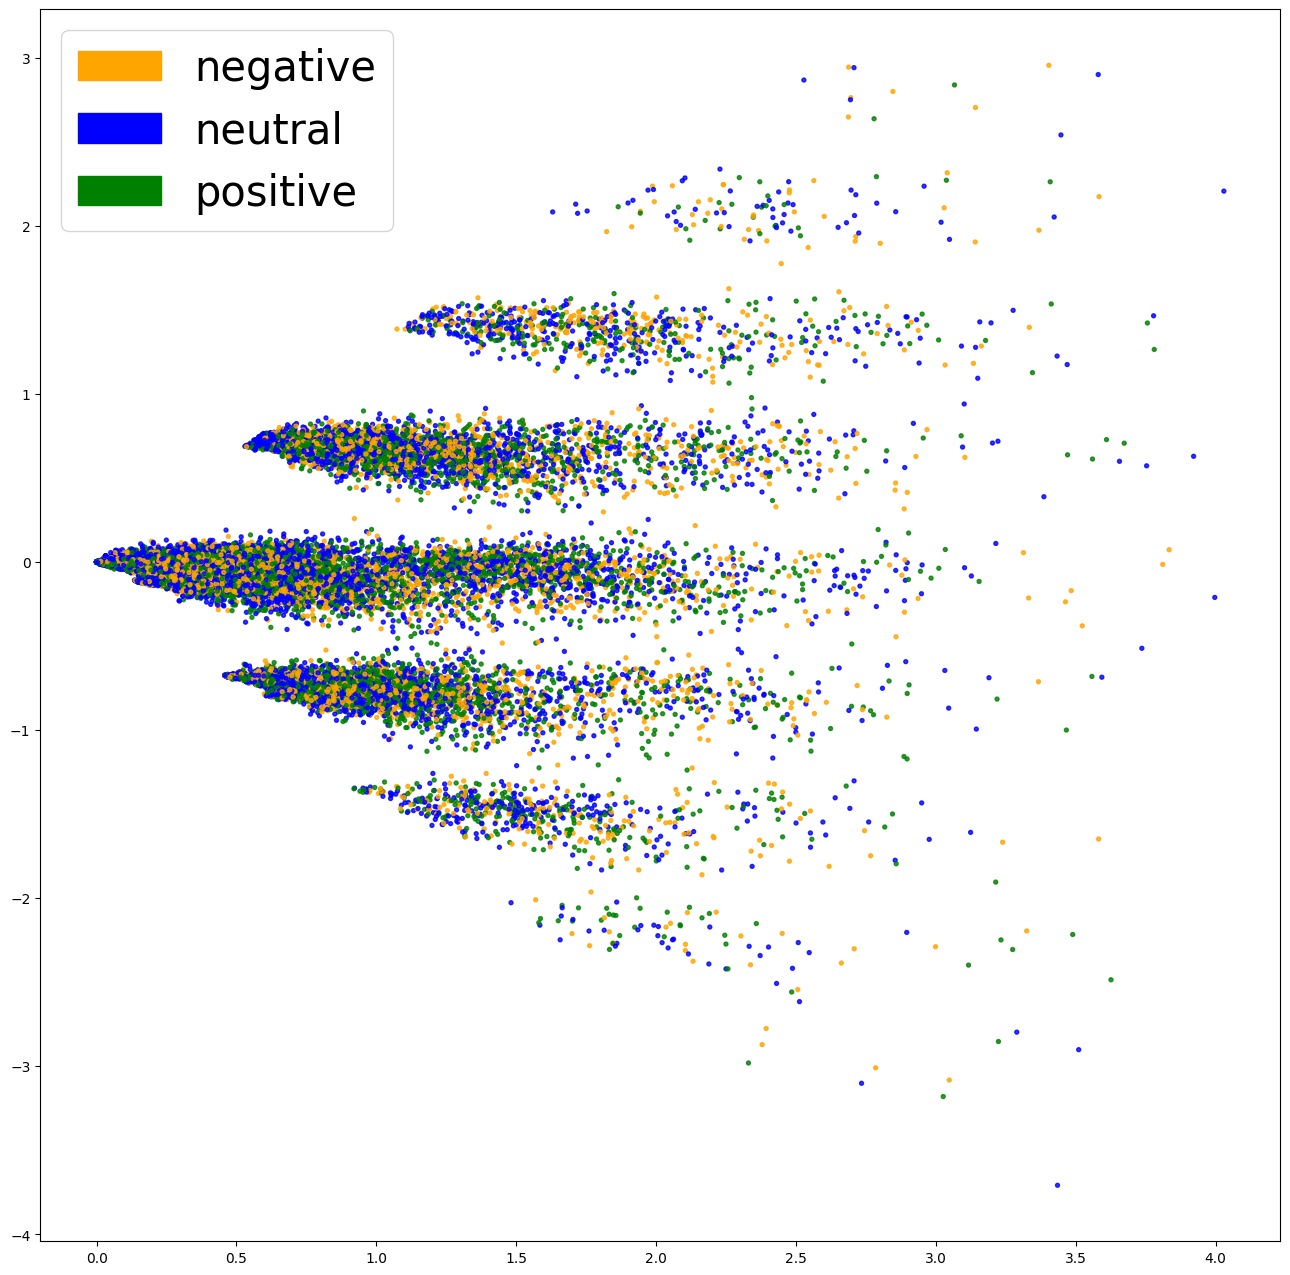

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','green']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='negative')
            blue_patch = mpatches.Patch(color='blue', label='neutral')
            green_patch = mpatches.Patch(color='green', label='positive')
            plt.legend(handles=[orange_patch, blue_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))
plot_LSA(X_train_counts, y_train)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, r2_score, classification_report

def get_metrics(y_test, y_predicted):
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')

    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')

    r2 = r2_score(y_test, y_predicted)
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1, r2

accuracy, precision, recall, f1, r2 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, r2 = %.3f" % (accuracy, precision, recall, f1,r2))

accuracy = 0.648, precision = 0.648, recall = 0.648, f1 = 0.648, r2 = 0.191


In [ ]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

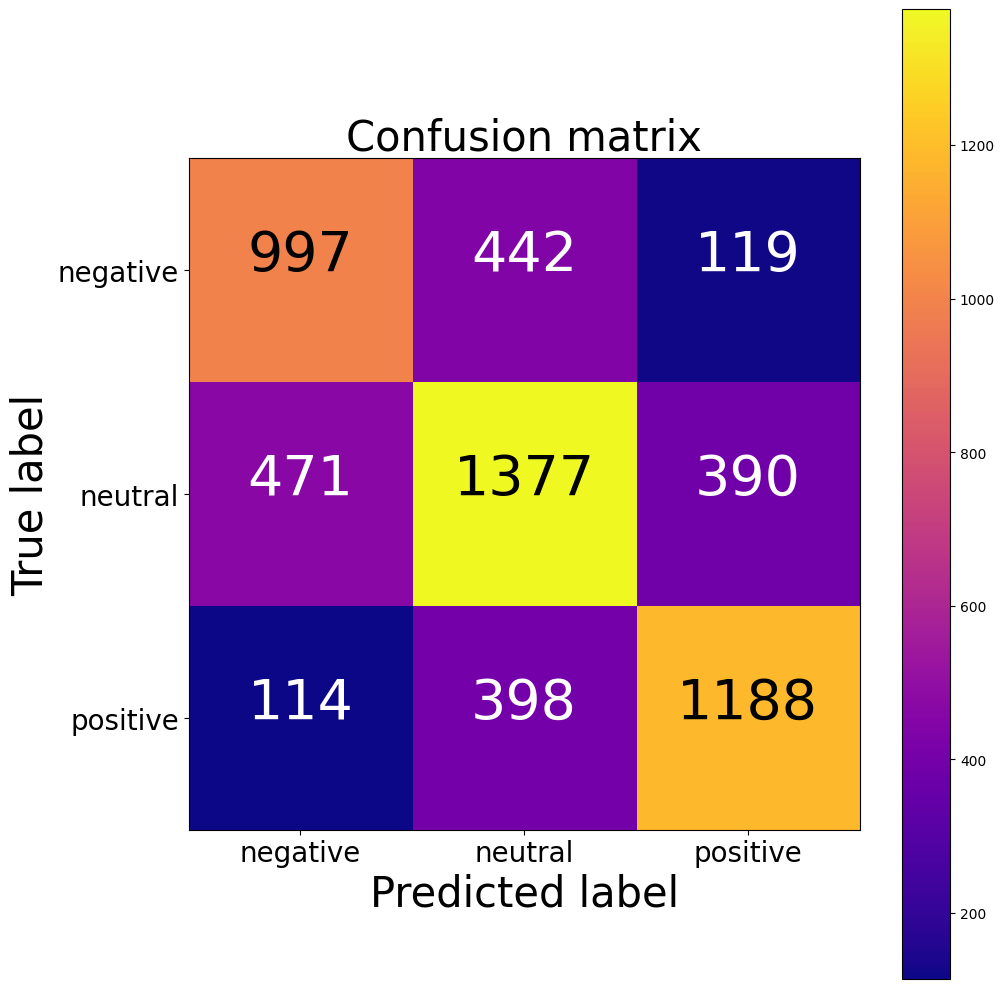

[[ 997  442  119]
 [ 471 1377  390]
 [ 114  398 1188]]


In [ ]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['negative','neutral','positive'], normalize=False, title='Confusion matrix', cmap="plasma")
plt.show()
print(cm)

In [ ]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}

    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

In [ ]:
print(importance)

{0: {'tops': [(6.072946463245223, 'stressed'), (6.096013542468298, 'cookoutofthecentury'), (6.576058253758132, 'orlando'), (6.675181686243191, 'sucks'), (6.848050567806605, 'mommas'), (7.042961085415789, 'gourmetcook'), (7.279912460036296, 'struggling'), (7.676825895724633, 'maxium'), (7.681616338962533, 'mas'), (7.810254090614826, 'twitpeeps')], 'bottom': [(-5.291777807247151, 'lovely'), (-5.331702484322799, 'wonderful'), (-5.36158108277915, 'note'), (-5.98381087518022, 'cereal'), (-6.385532631271635, 'thanxx'), (-6.422821646381595, 'glad'), (-6.695442446412917, 'wellllll'), (-6.899108367335942, 'surviving'), (-7.64423022419256, 'hopefully'), (-10.582761005454463, 'chu')]}, 1: {'tops': [(4.867214436865894, 'indoors'), (5.166878655787125, 'keeper'), (5.200451983163189, 'eeeeeeek'), (5.221904585165223, 'ditto'), (5.259904383147051, 'sleepiness'), (5.47284095504292, 'nancy'), (5.76112150914664, 'nothin'), (5.801788922054612, 'starwarsday'), (5.902930222651695, 'trick'), (8.02860350451002

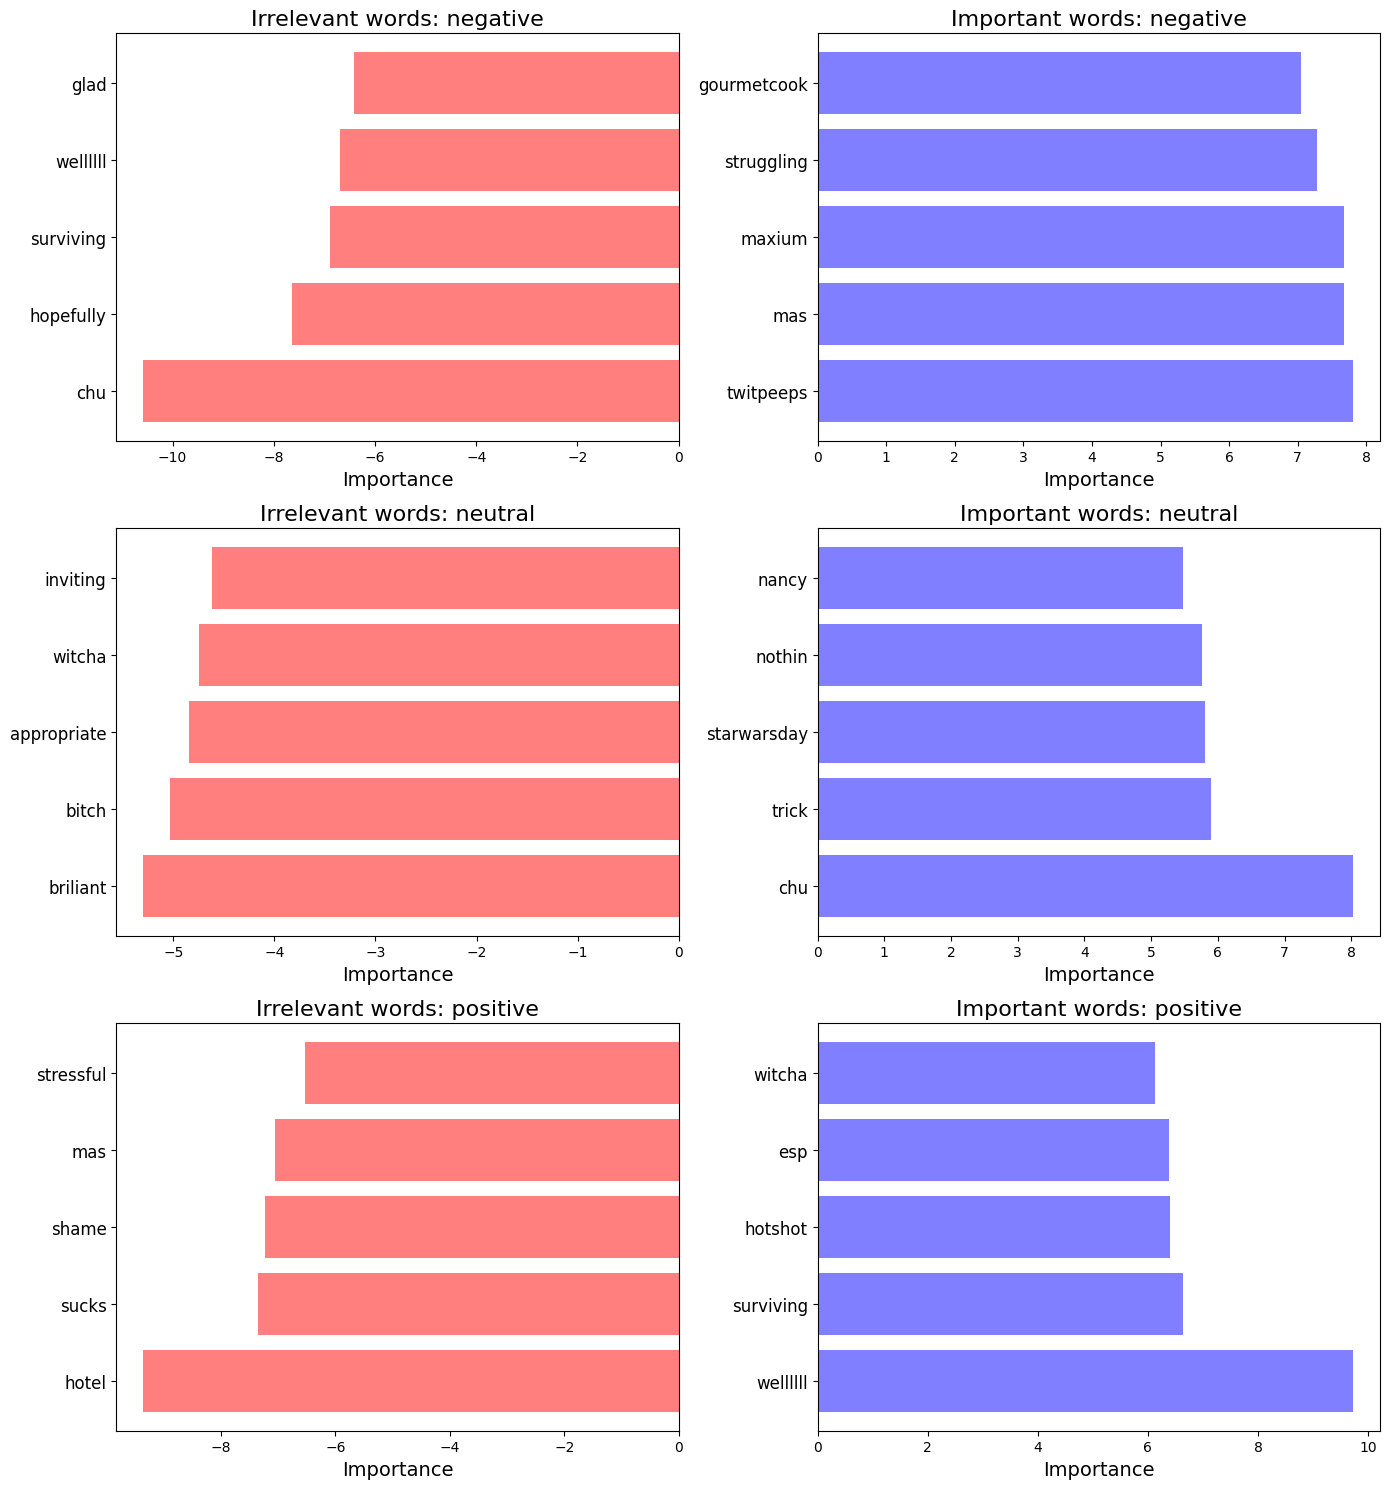

In [ ]:
def plot_important_words_multi(importance, class_labels, n=5):

    num_classes = len(class_labels)
    fig, axes = plt.subplots(num_classes, 2, figsize=(14, 5 * num_classes))

    for class_index, label in enumerate(class_labels):
        # Извлекаем топовые и наименее важные слова для класса
        top_scores = [a[0] for a in importance[class_index]['tops']]
        top_words = [a[1] for a in importance[class_index]['tops']]
        bottom_scores = [a[0] for a in importance[class_index]['bottom']]
        bottom_words = [a[1] for a in importance[class_index]['bottom']]

        # Подготовка данных для графиков
        y_pos_top = np.arange(len(top_words))
        y_pos_bottom = np.arange(len(bottom_words))

        # Сортируем для лучшего отображения
        top_pairs = sorted(zip(top_words, top_scores), key=lambda x: x[1])
        bottom_pairs = sorted(zip(bottom_words, bottom_scores), key=lambda x: x[1], reverse=True)

        top_words, top_scores = zip(*top_pairs)
        bottom_words, bottom_scores = zip(*bottom_pairs)

        axes[class_index, 0].barh(y_pos_bottom, bottom_scores, align='center', alpha=0.5, color='red')
        axes[class_index, 0].set_yticks(y_pos_bottom)
        axes[class_index, 0].set_yticklabels(bottom_words, fontsize=12)
        axes[class_index, 0].invert_yaxis()
        axes[class_index, 0].set_title(f"Irrelevant words: {label}", fontsize=16)
        axes[class_index, 0].set_xlabel("Importance", fontsize=14)

        axes[class_index, 1].barh(y_pos_top, top_scores, align='center', alpha=0.5, color='blue')
        axes[class_index, 1].set_yticks(y_pos_top)
        axes[class_index, 1].set_yticklabels(top_words, fontsize=12)
        axes[class_index, 1].invert_yaxis()
        axes[class_index, 1].set_title(f"Important words: {label}", fontsize=16)
        axes[class_index, 1].set_xlabel("Importance", fontsize=14)

    plt.tight_layout()
    plt.show()

# Ваша функция get_most_important_features для получения значимых слов
importance = get_most_important_features(count_vectorizer, clf, n=5)

# Названия классов
class_names = ["negative", "neutral", "positive"]  # Укажите имена классов по вашему выбору

# Вызов функции для визуализации
plot_important_words_multi(importance, class_names)

In [ ]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

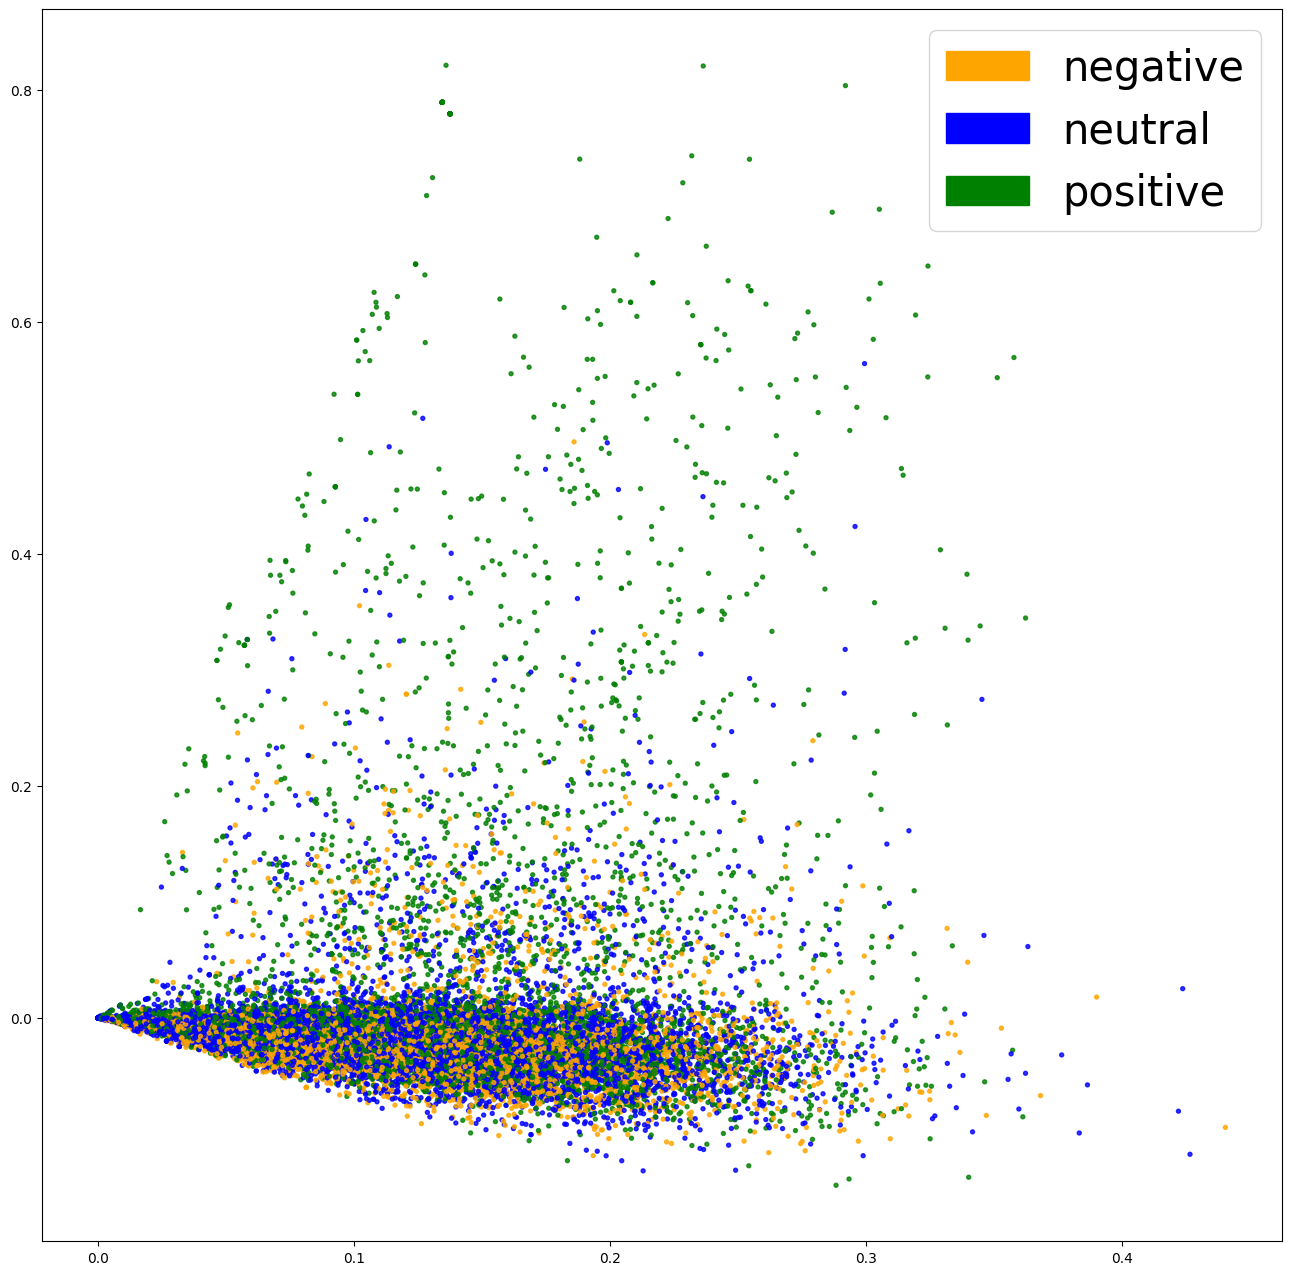

In [ ]:
fig = plt.figure(figsize=(16, 16))
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [ ]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf, r2_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, r2 = %.3f"  % (accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf, r2_tfidf))

accuracy = 0.658, precision = 0.658, recall = 0.658, f1 = 0.658, r2 = 0.227


Ну, немного лучше, но незначительно

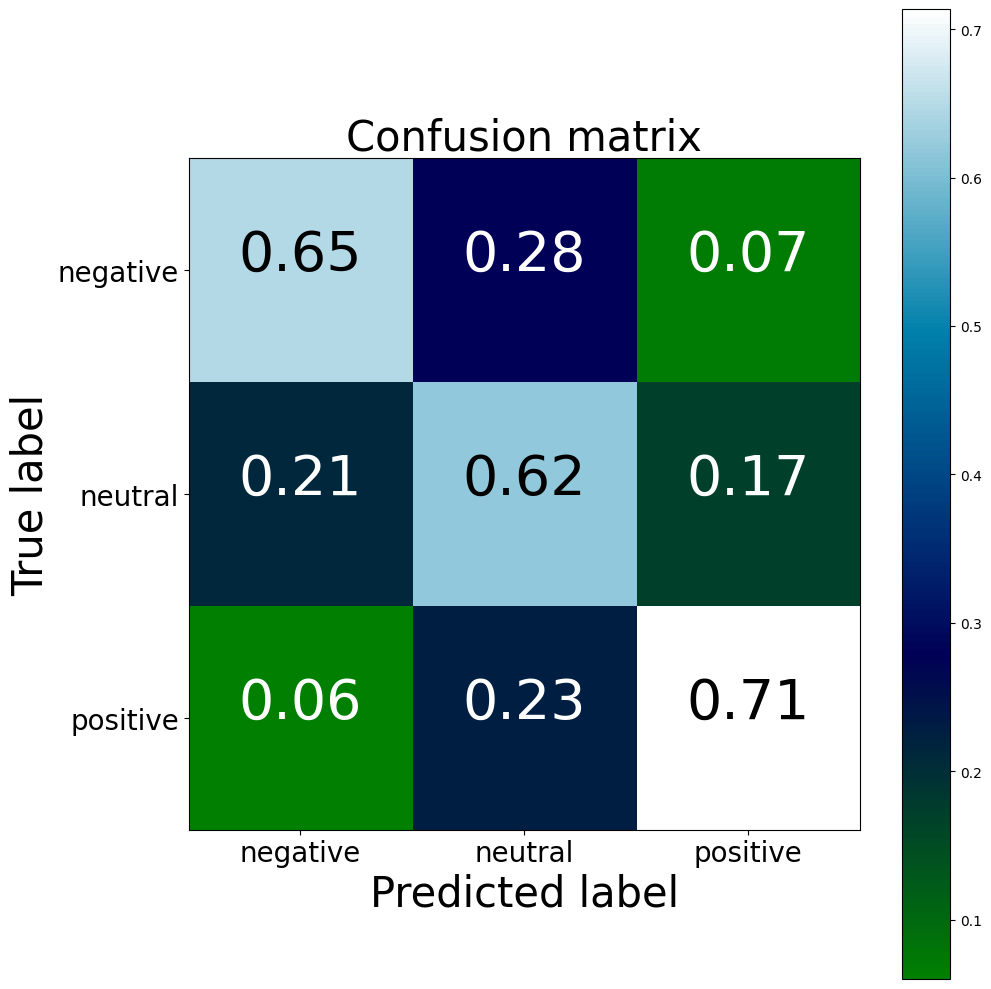

TFIDF confusion matrix
[[1012  437  109]
 [ 473 1390  375]
 [ 102  385 1213]]
BoW confusion matrix
[[ 997  442  119]
 [ 471 1377  390]
 [ 114  398 1188]]


In [ ]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=['negative','neutral','positive'], normalize=True, title='Confusion matrix', cmap="ocean")
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

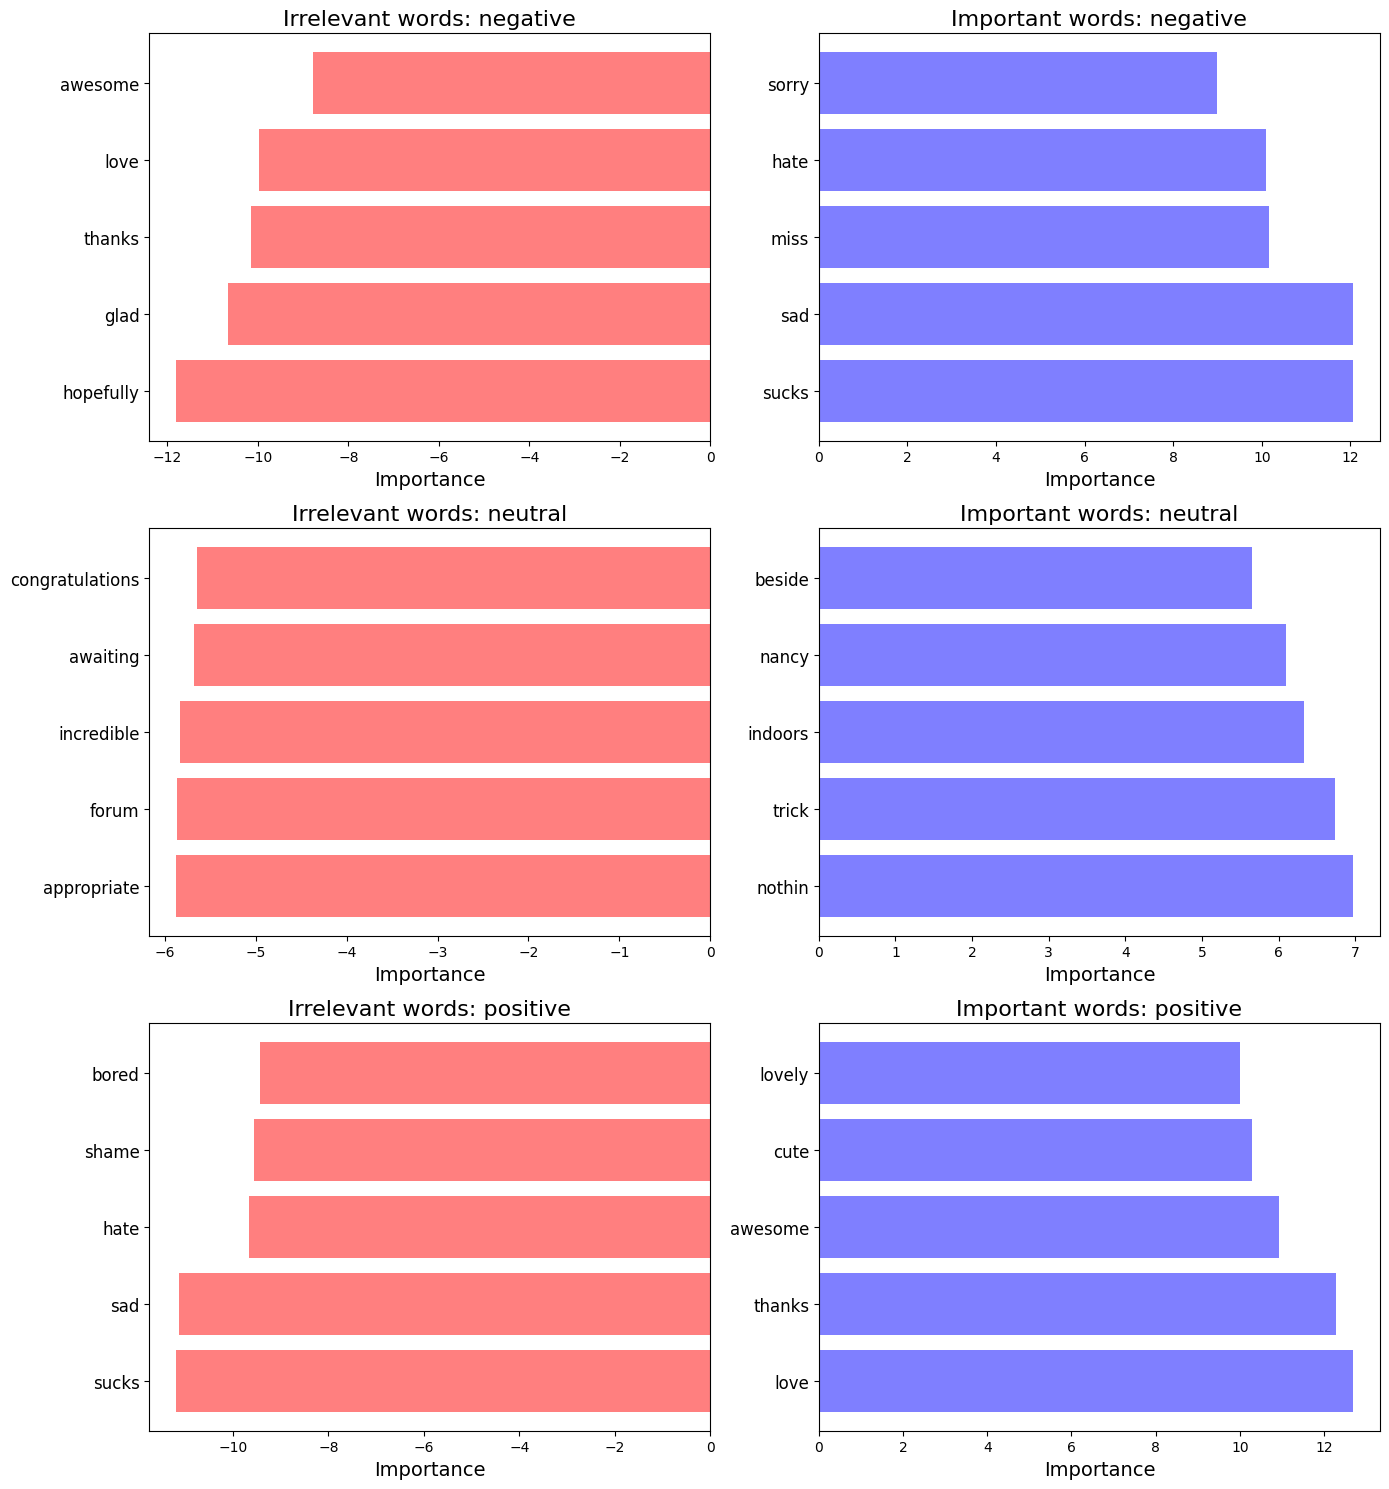

In [ ]:
# Ваша функция get_most_important_features для получения значимых слов
importance_tdif = get_most_important_features(tfidf_vectorizer, clf_tfidf, n=5)

# Названия классов
class_names = ["negative", "neutral", "positive"]  # Укажите имена классов по вашему выбору

# Вызов функции для визуализации
plot_important_words_multi(importance_tdif, class_names)

Теперь очень логично выглядит

In [ ]:
!python -m gensim.downloader --download word2vec-google-news-300

2024-12-05 08:31:43,258 : __main__ : INFO : Data has been installed and data path is /root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
import gensim

# Load Google's pre-trained Word2Vec model.
word2vec_path = "~/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors,
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [ ]:
embeddings = get_word2vec_embeddings(word2vec, clean_questions)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels,
                                                                                        test_size=0.2, random_state=40)

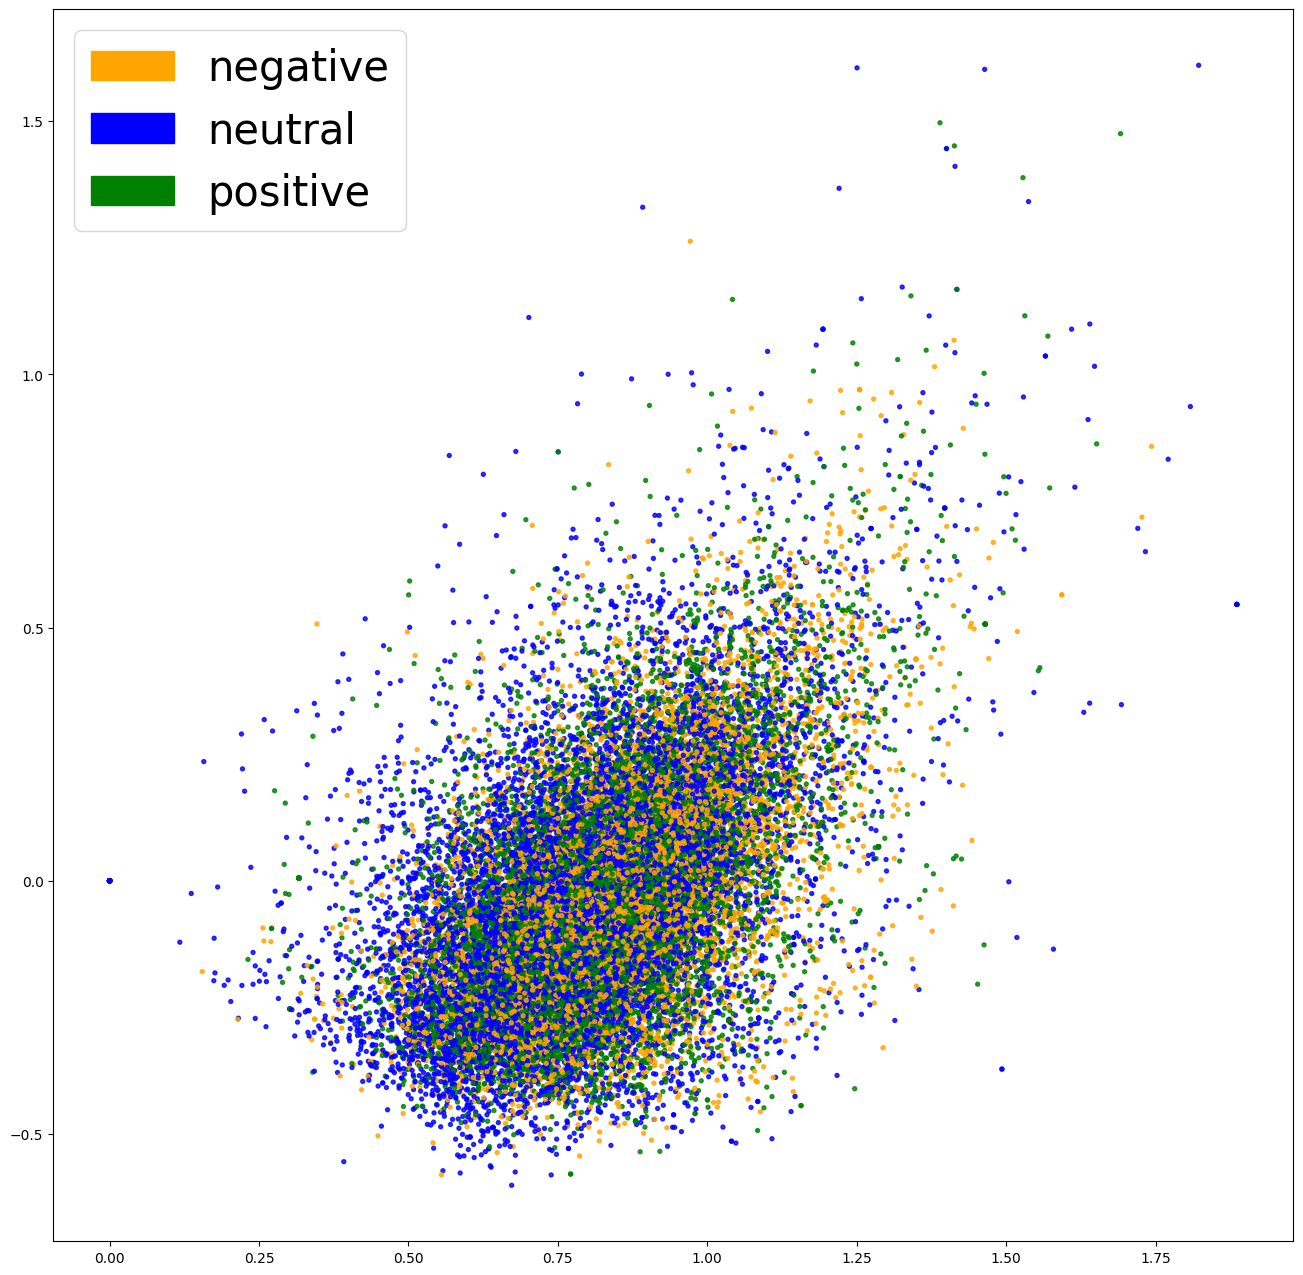

In [ ]:
fig = plt.figure(figsize=(16, 16))
plot_LSA(embeddings, list_labels)
plt.show()

In [ ]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec, r2_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, r2 = %.3f" % (accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec, r2_word2vec))

accuracy = 0.666, precision = 0.666, recall = 0.666, f1 = 0.666, r2 = 0.222


Еще немного лучше

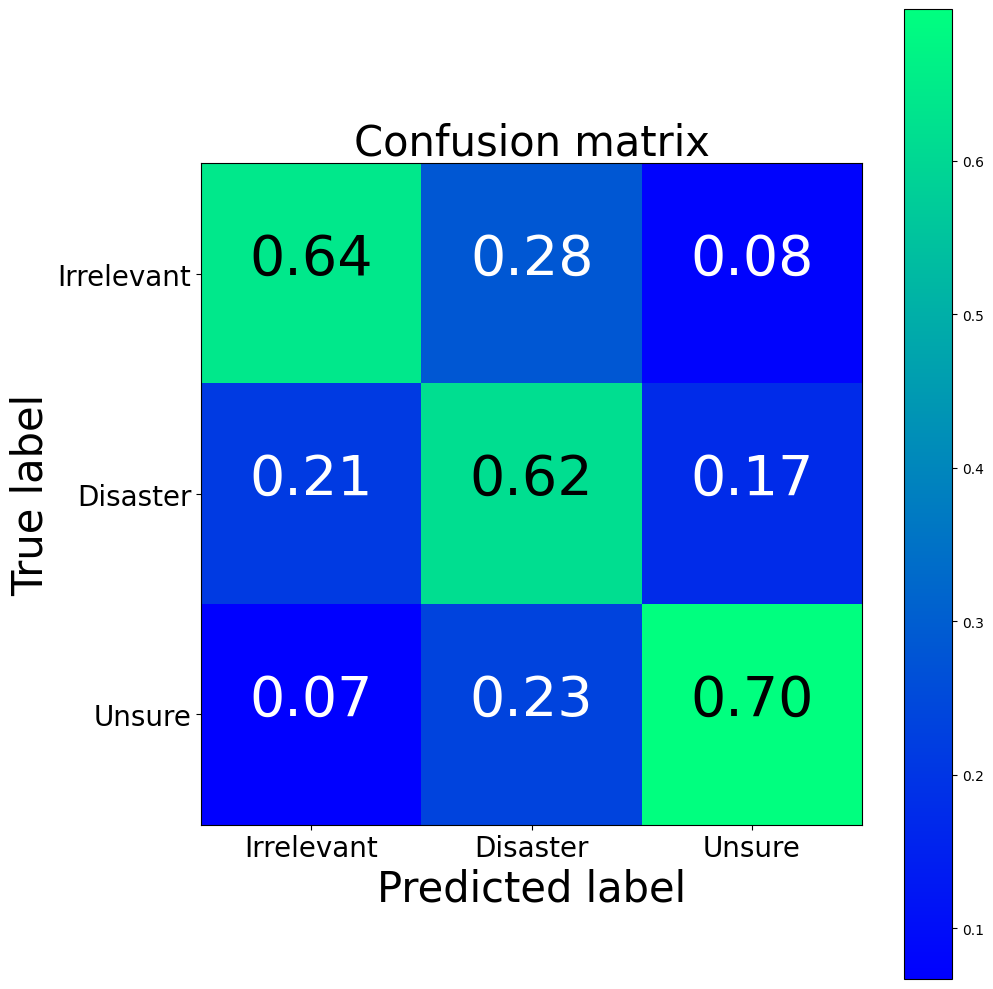

Word2Vec confusion matrix
[[1045  397  116]
 [ 476 1406  356]
 [ 116  376 1208]]
TFIDF confusion matrix
[[1012  437  109]
 [ 473 1390  375]
 [ 102  385 1213]]
BoW confusion matrix
[[ 997  442  119]
 [ 471 1377  390]
 [ 114  398 1188]]


In [ ]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=True, title='Confusion matrix')
plt.show()
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [ ]:
!pip install lime

In [ ]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(list_corpus, list_labels, test_size=0.2,
                                                                                random_state=40)
vector_store = word2vec
def word2vec_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []
    for example in examples:
        example_tokens = tokenizer.tokenize(example)
        vectorized_example = get_average_word2vec(example_tokens, vector_store, generate_missing=False, k=300)
        tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)

c = make_pipeline(count_vectorizer, clf)

In [ ]:
def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word2vec_pipeline, num_features=6)
    return exp

def visualize_one_exp(features, labels, index, class_names = ["negative","neutral", "positive"]):
    labels = list(map(int, labels))
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[labels[index]])
    exp.show_in_notebook(text=True)

In [ ]:
visualize_one_exp(X_test_data, y_test_data, 65)

Index: 65
True class: neutral


In [ ]:
visualize_one_exp(X_test_data, y_test_data, 60)

Index: 60
True class: neutral


In [ ]:
import random
from collections import defaultdict

random.seed(40)

def get_statistical_explanation(test_set, sample_size, word2vec_pipeline, label_dict):
    sample_sentences = random.sample(test_set, sample_size)
    explainer = LimeTextExplainer()

    labels_to_sentences = defaultdict(list)
    contributors = defaultdict(dict)

    # First, find contributing words to each class
    for sentence in sample_sentences:
        probabilities = word2vec_pipeline([sentence])
        curr_label = probabilities[0].argmax()
        labels_to_sentences[curr_label].append(sentence)
        exp = explainer.explain_instance(sentence, word2vec_pipeline, num_features=6, labels=[curr_label])
        listed_explanation = exp.as_list(label=curr_label)

        for word,contributing_weight in listed_explanation:
            if word in contributors[curr_label]:
                contributors[curr_label][word].append(contributing_weight)
            else:
                contributors[curr_label][word] = [contributing_weight]

    # average each word's contribution to a class, and sort them by impact
    average_contributions = {}
    sorted_contributions = {}
    for label,lexica in contributors.items():
        curr_label = label
        curr_lexica = lexica
        average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
        for word,scores in curr_lexica.items():
            average_contributions[curr_label].loc[word] = np.sum(np.array(scores))/sample_size
        detractors = average_contributions[curr_label].sort_values()
        supporters = average_contributions[curr_label].sort_values(ascending=False)
        sorted_contributions[label_dict[curr_label]] = {
            'detractors':detractors,
             'supporters': supporters
        }
    return sorted_contributions

label_to_text = {
    0: 'Нейтральное',
    1: 'Отрицательное',
    2: 'Положительное'
}
sorted_contributions = get_statistical_explanation(X_test_data, 100, word2vec_pipeline, label_to_text)

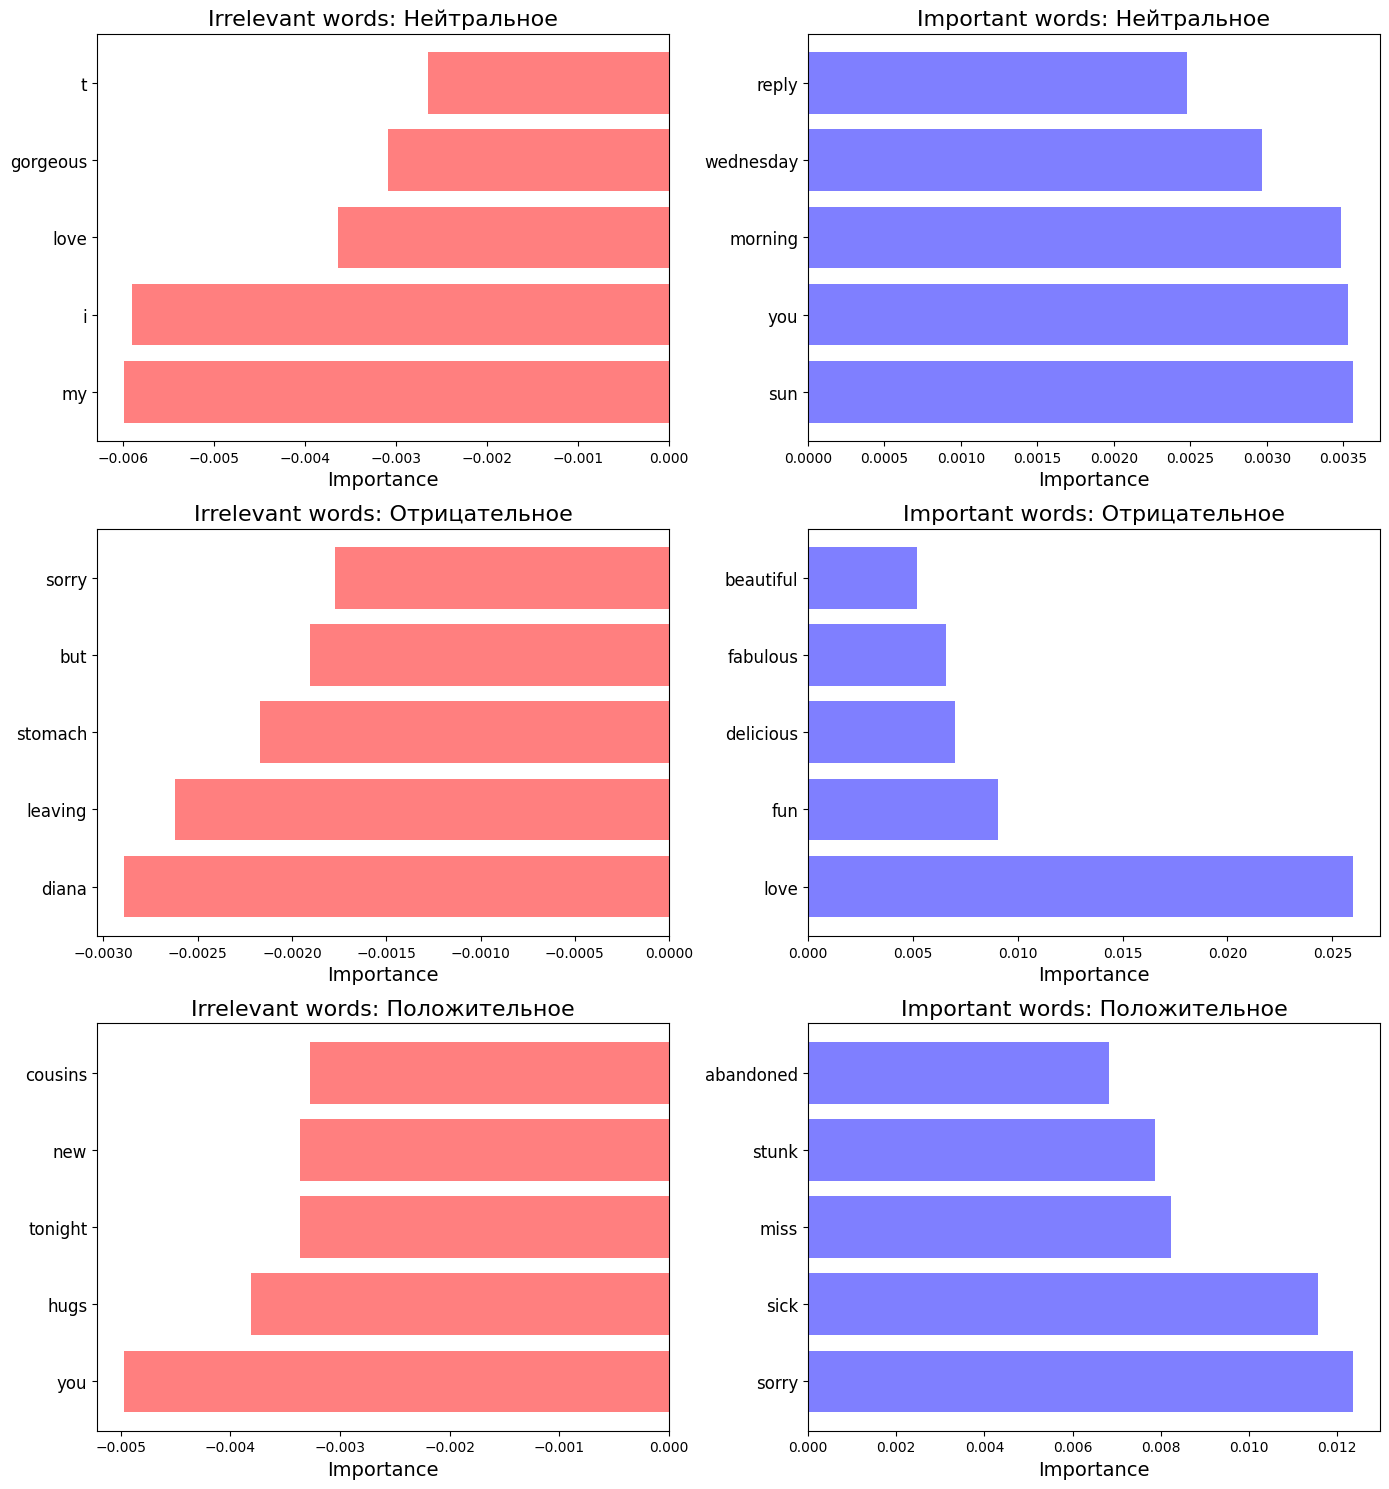

In [ ]:
# Преобразуем sorted_contributions в формат importance
importance_multi = []

for class_label, contributions in sorted_contributions.items():
    detractors = contributions['detractors']
    supporters = contributions['supporters']

    importance_multi.append({
        'tops': [(supporters[word], word) for word in supporters.index[:5]],
        'bottom': [(detractors[word], word) for word in detractors.index[:5]]
    })

# Вызов функции для визуализации
plot_important_words_multi(importance_multi, list(label_to_text.values()), n=5)

In [ ]:
clean_questions

Unnamed: 0      textID  \
0               0  cb774db0d1   
1               1  549e992a42   
2               2  088c60f138   
3               3  9642c003ef   
4               4  358bd9e861   
...           ...         ...   
27476       27476  4eac33d1c0   
27477       27477  4f4c4fc327   
27478       27478  f67aae2310   
27479       27479  ed167662a5   
27480       27480  6f7127d9d7   

                                                    text  \
0                    i`d have responded, if i were going   
1          sooo sad i will miss you here in san diego!!!   
2                              my boss is bullying me...   
3                         what interview! leave me alone   
4       sons of ****, why couldn`t they put them on t...   
...                                                  ...   
27476   wish we could come see u on denver  husband l...   
27477   i`ve wondered about rake to.  the client has ...   
27478   yay good for both of you. enjoy the break - y...   
27479                         but it was worth it  ****.   
27480     all this flirting going on - the atg smiles...   

                                           selected_text sentiment  \
0                    I`d have responded, if I were going   neutral   
1                                               Sooo SAD  negative   
2                                            bullying me  negative   
3                                         leave me alone  negative   
4                                          Sons of ****,  negative   
...                                                  ...       ...   
27476                                             d lost  negative   
27477                                      , don`t force  negative   
27478                          Yay good for both of you.  positive   
27479                         But it was worth it  ****.  positive   
27480  All this flirting going on - The ATG smiles. Y...   neutral   

                                                  tokens  sentiment_ind  
0            [i, d, have, responded, if, i, were, going]            1.0  
1      [sooo, sad, i, will, miss, you, here, in, san,...            0.0  
2                           [my, boss, is, bullying, me]            0.0  
3                    [what, interview, leave, me, alone]            0.0  
4      [sons, of, why, couldn, t, they, put, them, on...            0.0  
...                                                  ...            ...  
27476  [wish, we, could, come, see, u, on, denver, hu...            0.0  
27477  [i, ve, wondered, about, rake, to, the, client...            0.0  
27478  [yay, good, for, both, of, you, enjoy, the, br...            2.0  
27479                          [but, it, was, worth, it]            2.0  
27480  [all, this, flirting, going, on, the, atg, smi...            1.0  

[27480 rows x 7 columns]

In [ ]:
from tensorflow.keras.preprocessing.text  import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(clean_questions["text"].tolist())
sequences = tokenizer.texts_to_sequences(clean_questions["text"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(clean_questions["sentiment_ind"]))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 26597 unique tokens.
(26598, 300)


In [ ]:
from keras.layers import Dense, Input, Flatten, Dropout, Concatenate
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):

    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)

    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

In [ ]:
x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM,
                len(list(clean_questions["sentiment"].unique())), False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)

Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 48s 253ms/step - acc: 0.4464 - loss: 1.0454 - val_acc: 0.6747 - val_loss: 0.7483
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - acc: 0.6899 - loss: 0.7257 - val_acc: 0.7147 - val_loss: 0.6854
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 81s 244ms/step - acc: 0.7277 - loss: 0.6488 - val_acc: 0.7207 - val_loss: 0.6684
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 83s 252ms/step - acc: 0.7470 - loss: 0.5952 - val_acc: 0.7258 - val_loss: 0.6609
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 81s 248ms/step - acc: 0.7795 - loss: 0.5305 - val_acc: 0.7211 - val_loss: 0.6658
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 42s 243ms/step - acc: 0.8165 - loss: 0.4646 - val_acc: 0.7216 - val_loss: 0.7098
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 83s 249ms/step - acc: 0.8418 - loss: 0.4044 - val_acc: 0.7207 - val_loss: 0.7073
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 80s 236ms/step - acc: 0.8640 - loss: 0.3515 - val_acc: 0.7183 - val_loss: 0.7550
Epoch 9/10
172/172 ━━━━━━━━━━━━━

In [ ]:
y_pred = model.predict(x_val)

172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step


In [ ]:
y_pred_cnn = np.argmax(y_pred, axis=1)
y_val_cnn = np.argmax(y_val, axis=1)

In [ ]:
y_val_cnn

array([2, 2, 1, ..., 2, 1, 1])

In [ ]:
accuracy_cnn, precision_cnn, recall_cnn, f1_cnn, r2_cnn = get_metrics(y_val_cnn, y_pred_cnn)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, r2 = %.3f" % (accuracy_cnn, precision_cnn, recall_cnn, f1_cnn, r2_cnn))

accuracy = 0.719, precision = 0.722, recall = 0.719, f1 = 0.719, r2 = 0.366


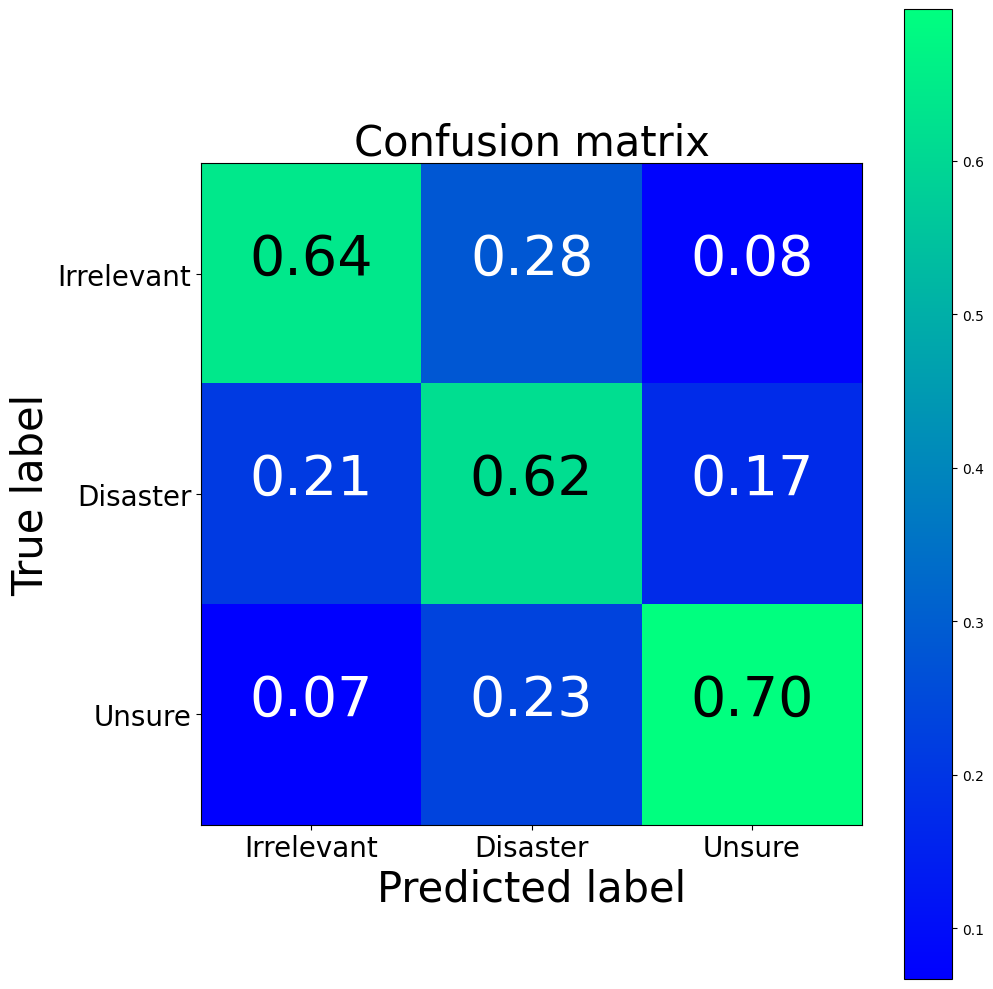

CNN confusion matrix
[[1062  425   79]
 [ 310 1643  271]
 [  97  362 1247]]
Word2Vec confusion matrix
[[1045  397  116]
 [ 476 1406  356]
 [ 116  376 1208]]
TFIDF confusion matrix
[[1012  437  109]
 [ 473 1390  375]
 [ 102  385 1213]]
BoW confusion matrix
[[ 997  442  119]
 [ 471 1377  390]
 [ 114  398 1188]]


In [ ]:
cm_cnn = confusion_matrix(y_val_cnn, y_pred_cnn)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=True, title='Confusion matrix')
plt.show()

print("CNN confusion matrix")
print(cm_cnn)
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

По метрикам лучше всего себя свёрточная нейросеть.